<a href="https://colab.research.google.com/github/manasik29/EDA1/blob/main/EDA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df = df.drop('Name', axis=1)

In [6]:
df = df.drop('PassengerId', axis=1)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


# **Exploratory Data Analysis**

**Check missing values**

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

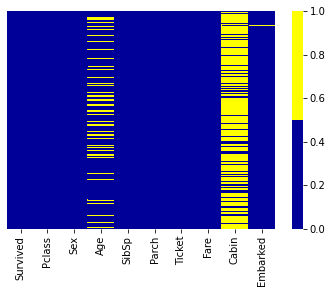

In [10]:
cols = df.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for missing, blue for non missing
sns.heatmap(df[cols].isnull(),
               yticklabels=False,cmap= sns.color_palette(colors))

Because of so many missing values in cabin, we will drop the column.

In [11]:
df = df.drop('Cabin', axis = 1)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


Mean imputation for Age and 

Mode imputation for Embarked column.

In [13]:
df['Age'].fillna(df.Age.mean(), inplace = True)

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [16]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**No missing values remian in our data.**

**Now we will correct the dtypes of columns.**

We will transform dtypes of Survived, Pclass, Sex, SibSp, Parch, Emabarked to categorical and for Age to int64.

In [17]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [18]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int64')
df['SibSp'] = df['SibSp'].astype('category')
df['Parch'] = df['Parch'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [19]:
df.dtypes

Survived    category
Pclass      category
Sex         category
Age            int64
SibSp       category
Parch       category
Ticket        object
Fare         float64
Embarked    category
dtype: object

**Check for duplicate values**

In [22]:
df[df.duplicated()].shape

(15, 9)

In [24]:
df[df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
201,0,3,male,29,8,2,CA. 2343,69.5500,S
324,0,3,male,29,8,2,CA. 2343,69.5500,S
409,0,3,female,29,3,1,4133,25.4667,S
413,0,2,male,29,0,0,239853,0.0000,S
466,0,2,male,29,0,0,239853,0.0000,S
485,0,3,female,29,3,1,4133,25.4667,S
612,1,3,female,29,1,0,367230,15.5000,Q
641,1,1,female,24,0,0,PC 17477,69.3000,C
644,1,3,female,0,2,1,2666,19.2583,C
692,1,3,male,29,0,0,1601,56.4958,S


In [26]:
df = df.drop_duplicates()

In [27]:
df.shape

(876, 9)

**Check descriptive stats**

In [28]:
df.describe()

,Age,Fare
count,876.000000,876.000000
mean,29.589041,32.035354
std,13.084956,49.975363
min,0.000000,0.000000
25%,22.000000,7.895800
50%,29.000000,14.427100
75%,35.000000,30.548950
max,80.000000,512.329200


**Univariate Analysis**

Out of 876 people on Titanic 540 died


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


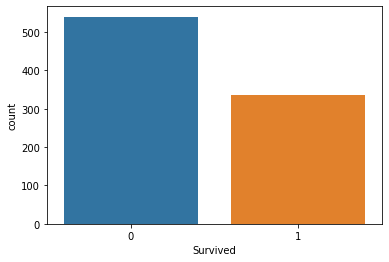

In [30]:
sns.countplot(df.Survived)

death = round(df['Survived'].value_counts()[0])

print("Out of 876 people on Titanic {} died".format(death) )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3    479
1    215
2    182
Name: Pclass, dtype: int64

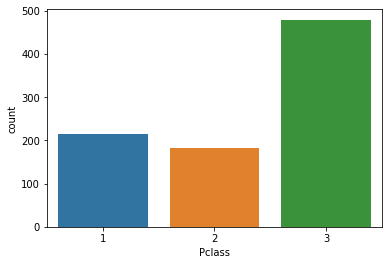

In [31]:
sns.countplot(df.Pclass)

df.Pclass.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


male      569
female    307
Name: Sex, dtype: int64

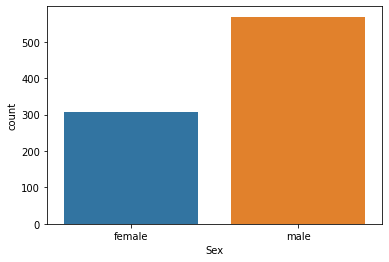

In [32]:
sns.countplot(df.Sex)

df.Sex.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    603
1    207
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64

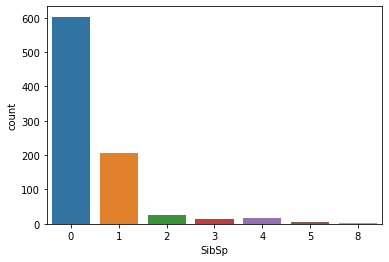

In [33]:
sns.countplot(df.SibSp)

df.SibSp.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    672
1    114
2     75
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

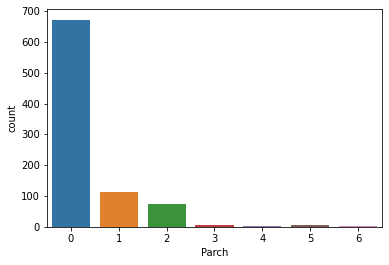

In [34]:
sns.countplot(df.Parch)

df.Parch.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


S    635
C    165
Q     76
Name: Embarked, dtype: int64

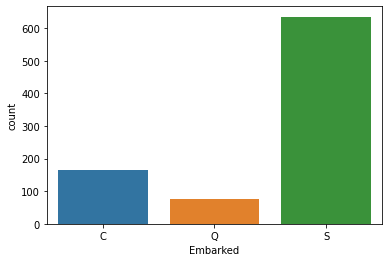

In [35]:
sns.countplot(df.Embarked)

df.Embarked.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


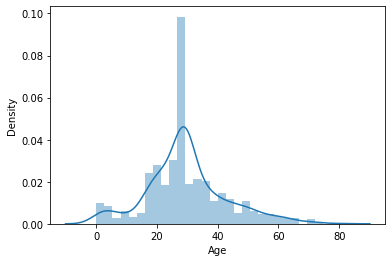

In [36]:
sns.distplot(df.Age)

In [38]:
print("The skewness of Age distplot is:", df.Age.skew())
print("The kurtosis of Age distplot is:", df.Age.kurt())

The skewness of Age distplot is: 0.4628637982054017
The kurtosis of Age distplot is: 0.9312815218716204


[array([ 2,  2,  0,  2,  1,  1,  1,  2,  2,  0,  2,  1,  1,  0,  2,  2,  2,
         0,  1,  0,  2,  1,  0, 58, 55, 66, 65, 59, 71, 70, 55, 61, 56, 58,
        59, 62, 58, 63, 65, 61, 60, 64, 65, 56, 63, 58, 55, 71, 64, 62, 62,
        60, 61, 57, 80, 56, 58, 70, 60, 60, 70, 57, 62, 74, 56])]

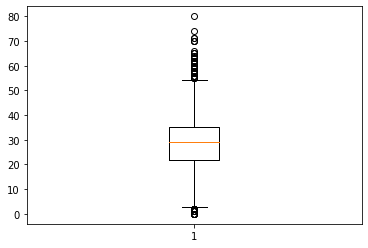

In [46]:
box = plt.boxplot(df.Age)
[item.get_ydata() for item in box['fliers']]

In [62]:
print("Number of people travelling between age of 60 to 70:", df[(df.Age>60) & (df.Age<70)].shape[0])
print("Number of people travelling between age of 70 to 75:", df[(df.Age>70) & (df.Age<75)].shape[0])
print("Number of people travelling above age of 75:", df[(df.Age>75)].shape[0])

print("Number of people travelling between age of 0 to 3:", df[(df.Age>0) & (df.Age<3)].shape[0])

Number of people travelling between age of 60 to 70: 15
Number of people travelling between age of 70 to 75: 3
Number of people travelling above age of 75: 1
Number of people travelling between age of 0 to 3: 17


Conclusion:

Tha Age data is normally distributed.

Deeper analysis for outlier detection.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


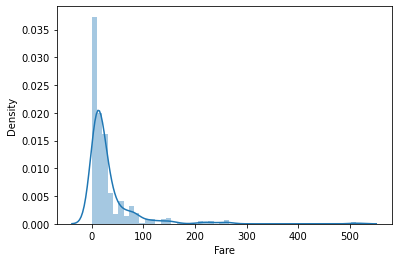

In [47]:
sns.distplot(df.Fare)

In [55]:
print("The skewness of Fare distplot is:", df.Fare.skew())
print("The kurtosis of Fare distplot is:", df.Fare.kurt())

The skewness of Fare distplot is: 4.795385760430077
The kurtosis of Fare distplot is: 33.260002158988605


[array([ 71.2833, 263.    , 146.5208,  82.1708,  76.7292,  80.    ,
         83.475 ,  73.5   , 263.    ,  77.2875, 247.5208,  73.5   ,
         77.2875,  79.2   ,  66.6   ,  69.55  ,  69.55  , 146.5208,
        113.275 ,  76.2917,  90.    ,  83.475 ,  90.    ,  79.2   ,
         86.5   , 512.3292,  79.65  , 153.4625, 135.6333,  77.9583,
         78.85  ,  91.0792, 151.55  , 247.5208, 151.55  , 110.8833,
        108.9   ,  83.1583, 262.375 , 164.8667, 134.5   , 135.6333,
        153.4625, 133.65  ,  66.6   , 134.5   , 263.    ,  75.25  ,
         69.3   , 135.6333,  82.1708, 211.5   , 227.525 ,  73.5   ,
        120.    , 113.275 ,  90.    , 120.    , 263.    ,  81.8583,
         89.1042,  91.0792,  90.    ,  78.2667, 151.55  ,  86.5   ,
        108.9   ,  93.5   , 221.7792, 106.425 ,  71.    , 106.425 ,
        110.8833, 227.525 ,  79.65  , 110.8833,  79.65  ,  79.2   ,
         78.2667, 153.4625,  65.    ,  77.9583,  76.7292,  73.5   ,
        113.275 , 133.65  ,  73.5   , 512.3292, 

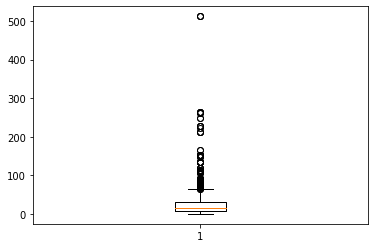

In [48]:
box1 = plt.boxplot(df.Fare)
[item.get_ydata() for item in box1['fliers']]

In [56]:
print("Number of people with Fare between 200 to 300:", df[(df.Fare>200) & (df.Fare<300)].shape[0])
print("Number of people with Fare above 300:", df[(df.Fare>300)].shape[0])

Number of people with Fare between 200 to 300: 17
Number of people with Fare above 300: 3


Conclusion:

Fare data is highly skewed.

There are few outliers.

**Multivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived,0,1
Pclass,,
1,80,135
2,95,87
3,365,114


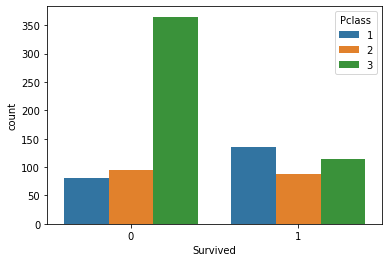

In [64]:
#Survival with Pclass

sns.countplot(df.Survived, hue=df.Pclass)

pd.crosstab(df.Pclass, df.Survived)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived,0,1
Sex,,
female,77,230
male,463,106


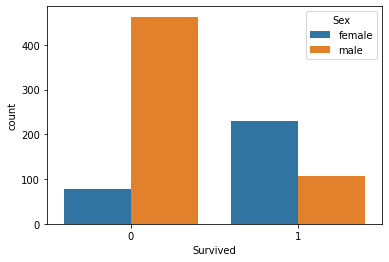

In [65]:
#Survival with Sex

sns.countplot(df.Survived, hue=df.Sex)

pd.crosstab(df.Sex, df.Survived)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived,0,1
Embarked,,
C,75,90
Q,47,29
S,418,217


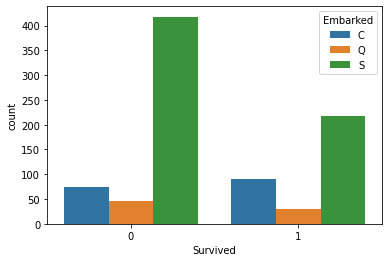

In [66]:
#Survival with Embarked

sns.countplot(df.Survived, hue=df.Embarked)

pd.crosstab(df.Embarked, df.Survived)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


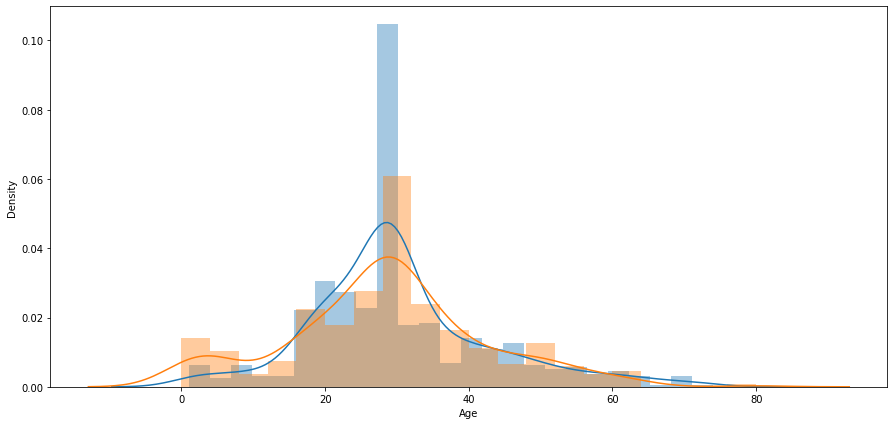

In [69]:
#Survived with Age

plt.figure(figsize=(15,7))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


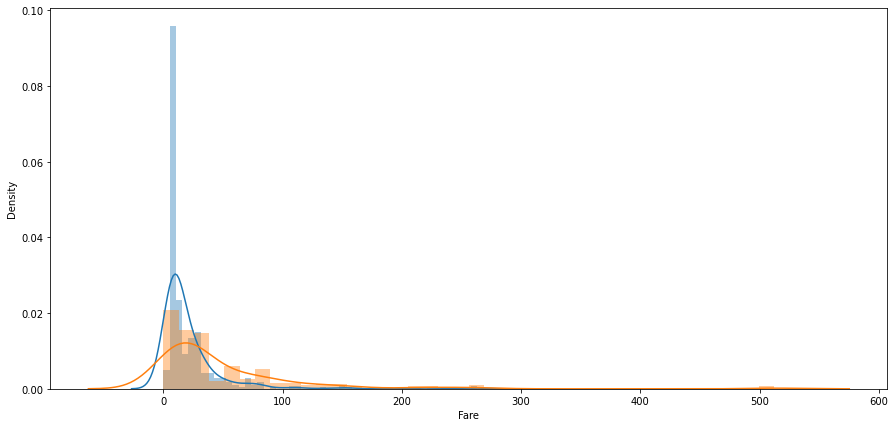

In [70]:
#Survived with Fare

plt.figure(figsize=(15,7))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

<Figure size 1080x504 with 0 Axes>

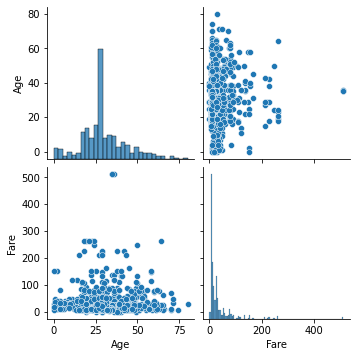

In [73]:
plt.figure(figsize=(15,7))
sns.pairplot(df)

In [75]:
(df.corr())

,Age,Fare
Age,1.000000,0.094103
Fare,0.094103,1.000000


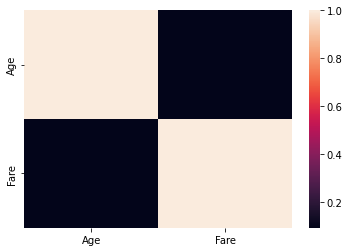

In [76]:
sns.heatmap(df.corr())